# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following  algorithms: **Decision Tree**, **Random Forest** and **Gradient Boosted Tree**, i.e. a total of 3 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [8]:
import pandas as pd
import openpyxl as opxl

data = pd.read_excel('alldata.xlsx', engine='openpyxl')
data.dropna(inplace=True)

data = data[data['alder'] != 0]

parties_data = data.groupby('parti')

age_stats = parties_data['alder'].describe()[['count', 'mean', 'min', 'max']]

display(age_stats)

,count,mean,min,max
parti,,,,
Alternativet,65.0,47.415385,21.0,79.0
Danmarksdemokraterne,37.0,51.216216,24.0,69.0
Dansk Folkeparti,49.0,45.530612,20.0,75.0
Det Konservative Folkeparti,94.0,44.723404,20.0,66.0
Enhedslisten,71.0,42.225352,19.0,74.0
"Frie Grønne, Danmarks Nye Venstrefløjsparti",26.0,34.807692,20.0,62.0
Kristendemokraterne,41.0,50.219512,21.0,73.0
Liberal Alliance,68.0,37.970588,18.0,72.0
Løsgænger,3.0,48.000000,40.0,58.0


In [9]:
questions = [col for col in data.columns if col not in ['parti', 'alder', 'navn', 'storkreds']]

data['score'] = data[questions].apply(lambda x: ((x == 2).sum() + (x == -2).sum())/len(x), axis=1)

sorted_data_by_score = data.sort_values(by='score', ascending=False)

display(sorted_data_by_score[['navn', 'score']])

,navn,score
88,Søren Vanting,1.000000
505,Sarah Nørris,1.000000
559,Kim Andkjær Doberck,0.897959
152,Rashid Ali,0.877551
44,Mohamed Abdikarim,0.877551
...,...,...
308,Morten Klessen,0.040816
509,Michael Mikkelsen,0.000000
216,Lars Aslan Rasmussen,0.000000
643,Søren Lund Hansen,0.000000


parti
Alternativet                                   0.910125
Danmarksdemokraterne                           0.608890
Dansk Folkeparti                               0.888009
Det Konservative Folkeparti                    0.891903
Enhedslisten                                   0.675810
Frie Grønne, Danmarks Nye Venstrefløjsparti    0.667277
Kristendemokraterne                            1.022729
Liberal Alliance                               0.732371
Løsgænger                                      1.450230
Moderaterne                                    0.890754
Nye Borgerlige                                 0.563509
Radikale Venstre                               0.857237
Socialdemokratiet                              0.823023
Socialistisk Folkeparti                        0.660496
Venstre                                        0.834677
dtype: float64

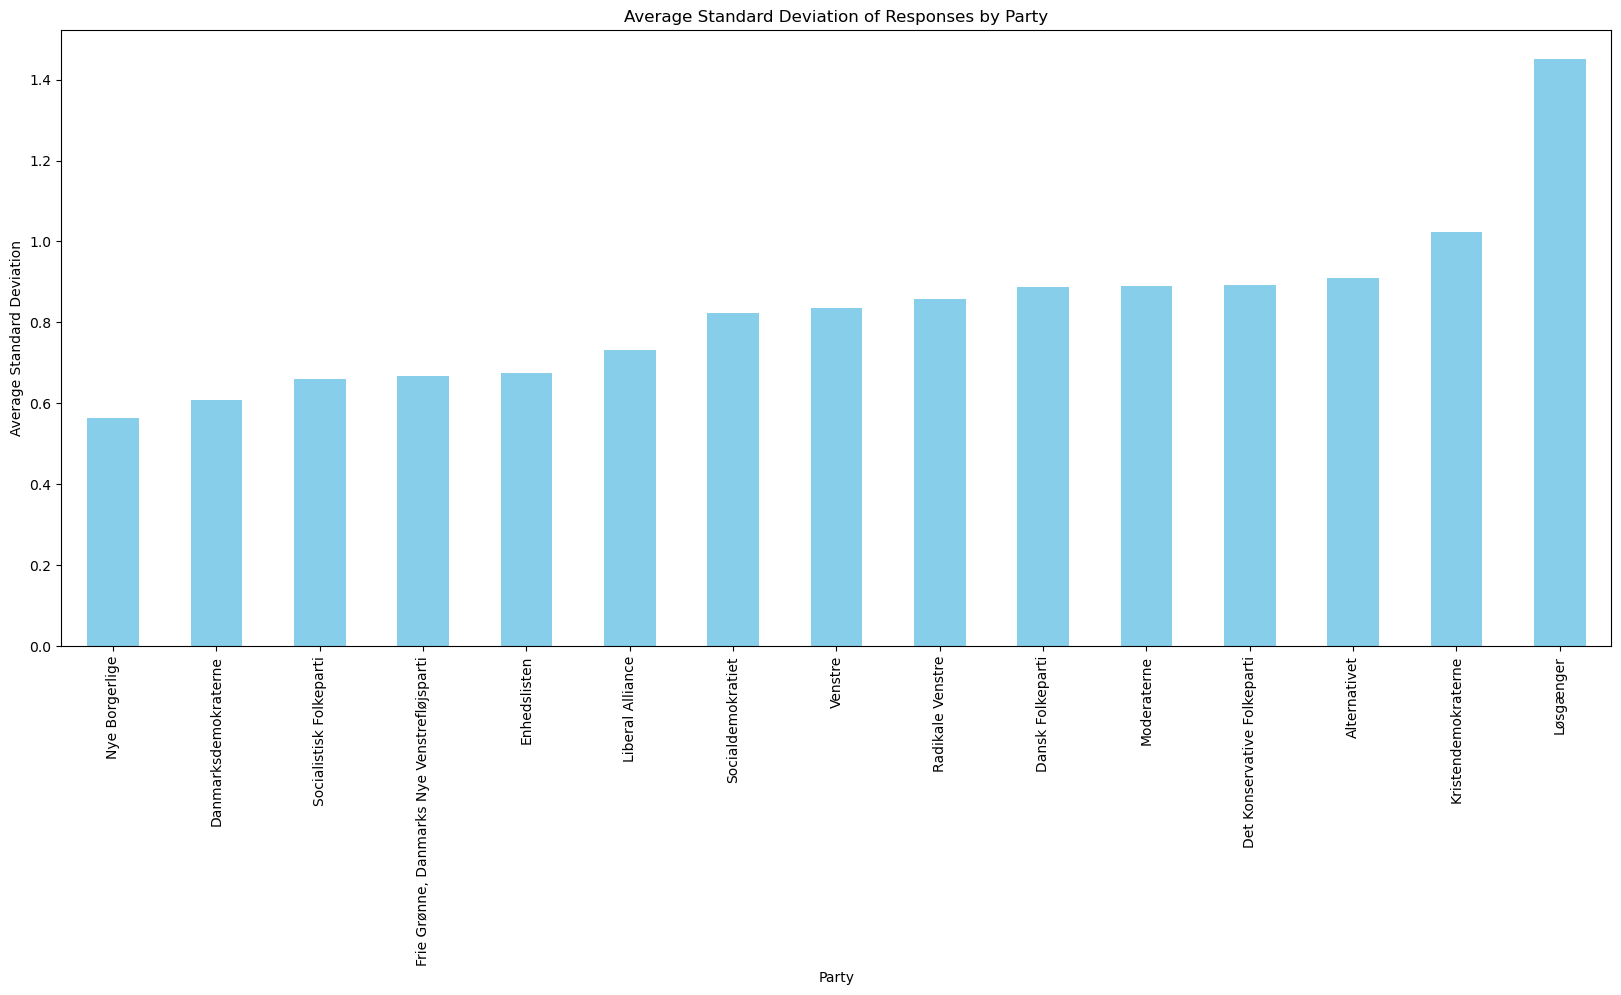

Overall Average Standard Deviation of Responses Across All Parties: 0.8318027697359694


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

party_std = data.groupby('parti')[questions].std()
party_avg_std = party_std.mean(axis=1)
display(party_avg_std)

plt.figure(figsize=(20, 8))
party_avg_std.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Standard Deviation of Responses by Party')
plt.xlabel('Party')
plt.ylabel('Average Standard Deviation')
plt.xticks(rotation=90)
plt.show()

overall_avg_std = party_avg_std.mean()
print("Overall Average Standard Deviation of Responses Across All Parties:", overall_avg_std)

In [11]:
# Løsgænger has the highest average standard deviation of responses which means that the responses of the members of this party are the most diverse and it means that they have dissagreements on the questions asked.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

X = data[questions]
y = data['parti']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=10)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_train_accuracy = dt_model.score(X_train, y_train)
dt_test_accuracy = accuracy_score(y_test, dt_predictions)
dt_wrong = (y_test != dt_predictions).sum()
print("Confusion matrix:  \n{}\n".format(confusion_matrix(y_test, dt_predictions)))
print("Decision Tree Train Accuracy: \n{}\n".format(dt_train_accuracy))
print("Decision Tree Test Accuracy: \n{}\n".format(dt_test_accuracy))
print("Precision: \n{}\n".format(precision_score(y_test, dt_predictions, average='weighted')))
print("Recall: \n{}\n".format(recall_score(y_test, dt_predictions, average='weighted')))
print("F1-score: \n{}".format(f1_score(y_test, dt_predictions, average='weighted')))
print(f"Number of people in the wrong party based on the Decision Tree prediction: {dt_wrong}")

Confusion matrix:  
[[14  0  0  1  0  0  0  0  0  0  1  0  3  0]
 [ 0 10  2  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  1 13  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  2  0 12  0  0  0  2  0  0  1  0  1  3]
 [ 1  0  0  0  9  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  4  2  1  0  1  0  1  0]
 [ 0  1  0  2  0  0  0 15  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  7  0  1  0  2  0]
 [ 0  0  1  0  0  0  0  0  0  9  0  0  0  1]
 [ 4  0  0  0  0  0  3  1  1  0 10  0  0  0]
 [ 1  0  0  0  1  0  0  0  0  0  0 15  1  3]
 [ 0  0  0  0  1  0  0  0  0  0  0  0 14  0]
 [ 0  2  0  2  0  0  0  1  0  0  0  0  0 17]]

Decision Tree Train Accuracy: 
0.9106583072100314

Decision Tree Test Accuracy: 
0.7136150234741784

Precision: 
0.7321480191384914

Recall: 
0.7136150234741784

F1-score: 
0.7117706139401223
Number of people in the wrong party based on the Decision Tree prediction: 61


In [13]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=10)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_train_accuracy = rf_model.score(X_train, y_train)
rf_test_accuracy = accuracy_score(y_test, rf_predictions)
rf_wrong = (y_test != rf_predictions).sum()
print("Confusion matrix:  \n{}\n".format(confusion_matrix(y_test, rf_predictions)))
print("Random Forest Train Accuracy: \n{}\n".format(rf_train_accuracy))
print("Random Forest Test Accuracy: \n{}\n".format(rf_test_accuracy))
print("Precision: \n{}\n".format(precision_score(y_test, rf_predictions, average='weighted')))
print("Recall: \n{}\n".format(recall_score(y_test, rf_predictions, average='weighted')))
print("F1-score: \n{}".format(f1_score(y_test, rf_predictions, average='weighted')))
print(f"Number of people in the wrong party based on the Random Forest prediction: {rf_wrong}")

Confusion matrix:  
[[15  0  0  0  0  1  0  0  0  0  1  0  2  0]
 [ 0 11  1  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  1  1  0  0  0  0  0  3]
 [ 1  0  0  0 11  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0 17  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1 18  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  1  2  0  0  0  1  0  0  0  0  0 18]]

Random Forest Train Accuracy: 
0.9890282131661442

Random Forest Test Accuracy: 
0.892018779342723

Precision: 
0.8992968228518528

Recall: 
0.892018779342723

F1-score: 
0.891743839102994
Number of people in the wrong party based on the Random Forest prediction: 23


In [14]:
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=10)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_train_accuracy = gb_model.score(X_train, y_train)
gb_test_accuracy = accuracy_score(y_test, gb_predictions)
gb_wrong = (y_test != gb_predictions).sum()
print("Confusion matrix:  \n{}\n".format(confusion_matrix(y_test, gb_predictions)))
print("Gradient Boosting Train Accuracy: \n{}\n".format(gb_train_accuracy))
print("Gradient Boosting Test Accuracy: \n{}\n".format(gb_test_accuracy))
print("Precision: \n{}\n".format(precision_score(y_test, gb_predictions, average='weighted')))
print("Recall: \n{}\n".format(recall_score(y_test, gb_predictions, average='weighted')))
print("F1-score: \n{}".format(f1_score(y_test, gb_predictions, average='weighted')))
print(f"Number of people in the wrong party based on the Gradient Boosting prediction: {gb_wrong}")

Confusion matrix:  
[[12  0  0  0  3  0  0  0  1  1  0  1  0  1  0]
 [ 0 11  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0 18  0  0  0  2  0  0  0  0  0  0  1]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  2  0]
 [ 1  0  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  8  2  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0 16  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  1  0  0  8  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  8  0  0  0  1]
 [ 2  0  0  0  0  0  1  0  0  0  0 15  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  2  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  2  0  0  0  2  0  0  0  0  0  0 18]]

Gradient Boosting Train Accuracy: 
1.0

Gradient Boosting Test Accuracy: 
0.8169014084507042

Precision: 
0.833234861518695

Recall: 
0.8169014084507042

F1-score: 
0.8191943639077017
Number of people in the wrong party based on the Gradient Boosting predict

d:\Calculator\Programe\Anaconda-Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
